<a href="https://colab.research.google.com/github/Orley74/Przetwarzanie_jezyka_naturalnego/blob/master/PJN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Pobranie tekstow z wolne lektury

In [ ]:
urls = ['https://wolnelektury.pl/media/book/txt/bulhakow-fatalne-jaja.txt',
        'https://wolnelektury.pl/media/book/txt/coolidge-co-kasia-robila.txt',
        'https://wolnelektury.pl/media/book/txt/alcott-male-kobietki.txt',
        'https://wolnelektury.pl/media/book/txt/bertrand-jedna-jeszcze-wiosna.txt',
        'https://wolnelektury.pl/media/book/txt/don-kichot-z-la-manchy.txt',
        'https://wolnelektury.pl/media/book/txt/bertrand-jedna-jeszcze-wiosna.txt',
        'https://wolnelektury.pl/media/book/txt/ajschylos-oresteja.txt',
        'https://wolnelektury.pl/media/book/txt/amicis-serce.txt',
        'https://wolnelektury.pl/media/book/txt/andrzejewski-ciemnosci-kryja-ziemie.txt',
        'https://wolnelektury.pl/media/book/txt/uwagi-z-powodu-listu-polaka-do-ministra-rosyjskiego.txt'
        ]

Pobranie tekstow

In [ ]:
import requests
corp = []

corp = [requests.get(url).text for url in urls]

In [ ]:
corp

Wykreslenie numerow

In [ ]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

r = requests.get('https://github.com/bieli/stopwords/blob/master/polish.stopwords.txt')
stopwords = r.json()['payload']['blob']['rawLines']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(preprocessor=preprocess_text,stop_words=stopwords)
X = vectorizer.fit_transform(corp)

zmienna document okresla dla jakiego dokumentu ma byc wykres TF


In [ ]:
document = 0

In [ ]:
first = X[document].toarray()[0]


In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

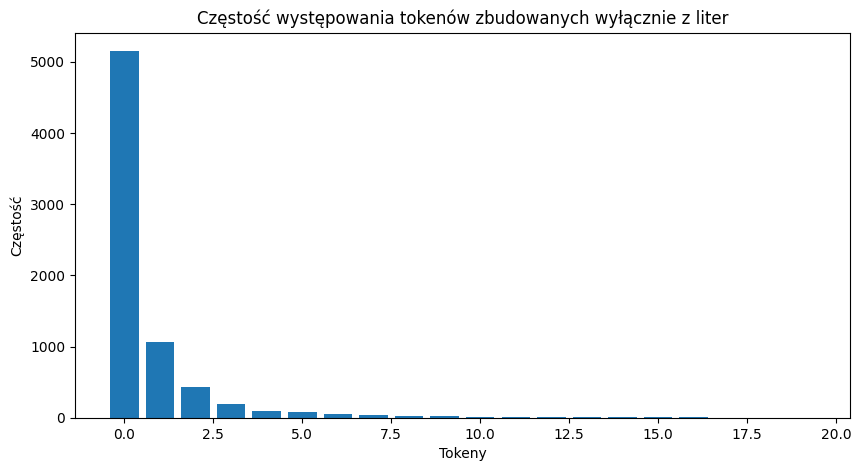

In [ ]:
freq = FreqDist(first)
data = sorted(freq.items(), key=lambda x: x[1], reverse=True)
data.pop(0)

plt.figure(figsize=(10, 5))
plt.bar(range(len(data[:20])), [val[1] for val in data[:20]], align='center')
plt.title('Częstość występowania tokenów zbudowanych wyłącznie z liter')
plt.xlabel('Tokeny')
plt.ylabel('Częstość')
plt.show()

Macierz TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(preprocessor=preprocess_text, stop_words=stopwords)


TFIDF = vectorizer2.fit_transform(corp)


feature_names = vectorizer2.get_feature_names_out()
print(feature_names)

TFIDF = TFIDF.toarray()
print(TFIDF)

['aa' 'abadia' 'abatucci' ... 'żłobem' 'żłobie' 'żłobu']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00150974 0.         0.         ... 0.         0.         0.        ]
 [0.00099663 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.00190699 ... 0.         0.         0.        ]
 [0.         0.00438539 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Macierz odleglosci cosinusowej

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
cosine_distances = pairwise_distances(TFIDF, metric='cosine')
print(cosine_distances)


[[0.         0.9355809  0.9291348  0.9760621  0.93169665 0.9760621
  0.95152915 0.84186371 0.93538798 0.95881026]
 [0.9355809  0.         0.80249316 0.98412813 0.92054775 0.98412813
  0.93891553 0.79903715 0.93417055 0.95386432]
 [0.9291348  0.80249316 0.         0.98575495 0.89652228 0.98575495
  0.91849619 0.75836851 0.91296447 0.94965871]
 [0.9760621  0.98412813 0.98575495 0.         0.98894852 0.
  0.97410592 0.9765451  0.98212559 0.93767701]
 [0.93169665 0.92054775 0.89652228 0.98894852 0.         0.98894852
  0.9180581  0.80915061 0.7874786  0.94033485]
 [0.9760621  0.98412813 0.98575495 0.         0.98894852 0.
  0.97410592 0.9765451  0.98212559 0.93767701]
 [0.95152915 0.93891553 0.91849619 0.97410592 0.9180581  0.97410592
  0.         0.84762134 0.9038741  0.94888926]
 [0.84186371 0.79903715 0.75836851 0.9765451  0.80915061 0.9765451
  0.84762134 0.         0.81203164 0.89585415]
 [0.93538798 0.93417055 0.91296447 0.98212559 0.7874786  0.98212559
  0.9038741  0.81203164 0.    

Macierz zredukowana do 2 wymiarow

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
TFIDF_reduced = svd.fit_transform(TFIDF)
print(TFIDF_reduced)

[[ 0.13595649  0.31285415]
 [ 0.15501649  0.44263397]
 [ 0.16995769  0.50335603]
 [ 0.94873619 -0.31179835]
 [ 0.15786007  0.47589537]
 [ 0.94873619 -0.31179835]
 [ 0.1478844   0.34001834]
 [ 0.23342229  0.64932706]
 [ 0.16716952  0.46194588]
 [ 0.18655903  0.21832466]]


Wyswietlanie punktow na osi

<ipython-input-96-9bfdd1baeb69>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(corp))


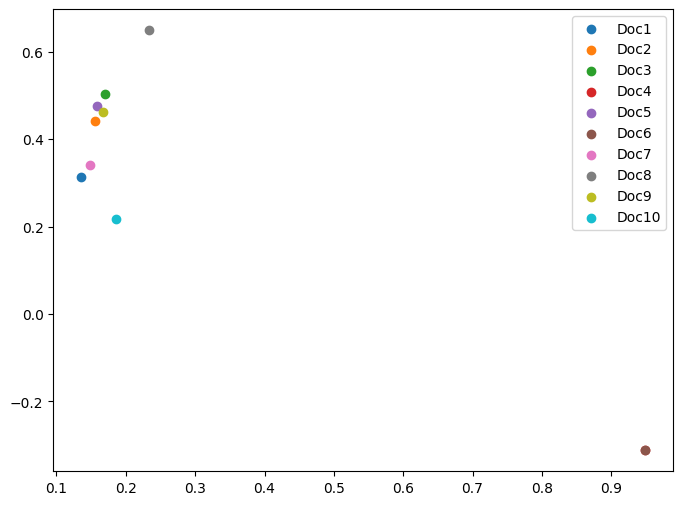

In [ ]:
import matplotlib.colors as mcolors

corp = ['Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5', 'Doc6', 'Doc7', 'Doc8', 'Doc9', 'Doc10']

color_palette = plt.cm.get_cmap('tab10', len(corp))

plt.figure(figsize=(8, 6))

for i, doc_id in enumerate(corp):
    plt.scatter(TFIDF_reduced[i, 0], TFIDF_reduced[i, 1], color=color_palette(i), label=doc_id)

plt.legend()
plt.show()



